Notebook to try out some neural network stuff.

# Load standard libraries

In [1]:
import sys
sys.path.insert(1, './src')
import time
import matplotlib.pyplot as plt

# Load my codes

In [2]:
import mnist_loader
import nn

# Load the data

In [3]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

# Varying number of hidden units

In [7]:
net30 = nn.NN()
net30.set_layers([784, 30, 10])
net30.init_weights_and_biases()

In [8]:
progress30 = net30.SGD(training_data, 30, 10, 3.0, test_data)
net30.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


In [27]:
net100 = nn.NN()
net100.set_layers([784, 100, 10])
net100.init_weights_and_biases()
progress100 = net100.SGD(training_data, 30, 10, 3.0, test_data)
net100.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


9494

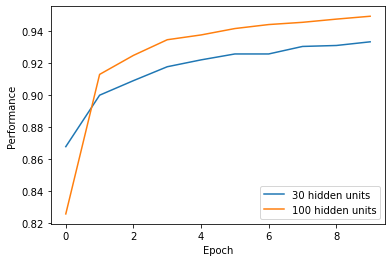

In [28]:
fig, ax = plt.subplots()
ax.plot(progress30, label='30 hidden units')
ax.plot(progress100, label='100 hidden units')
ax.set_xlabel('Epoch')
ax.set_ylabel('Performance')
ax.legend()
plt.show()

The above seems to suggest that more hidden units produce better results (which is what would be expected). However, it varies a lot between runs. The explanation is probably that it depends a lot on the (random) weight initialisation. Also, with more parameters, there is a higher risk of overfitting.

Now let us try to add another layer, both with 30 neurons. This should add a lot (30x30) of extra parameters.

In [32]:
net3030 = nn.NN()
net3030.set_layers([784, 30, 30, 10])
net3030.init_weights_and_biases()
progress3030 = net3030.SGD(training_data, 30, 10, 3.0, test_data)
net3030.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


9367

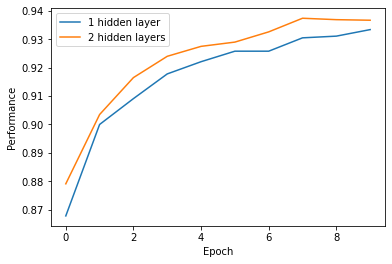

In [33]:
fig, ax = plt.subplots()
ax.plot(progress30, label='1 hidden layer')
ax.plot(progress3030, label='2 hidden layers')
ax.set_xlabel('Epoch')
ax.set_ylabel('Performance')
ax.legend()
plt.show()

There seems to be some improvement and it seems to be somewhat consistent over a number of tries.

# Varying learning rate

Take 30 units in the hidden layer and vary the learning rate.

In [34]:
net2 = nn.NN()
net2.set_layers([784, 30, 10])
net2.init_weights_and_biases()
progress2 = net2.SGD(training_data, 30, 10, 0.1, test_data)
net2.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


8004

In [35]:
net3 = nn.NN()
net3.set_layers([784, 30, 10])
net3.init_weights_and_biases()
progress3 = net3.SGD(training_data, 30, 10, 0.01, test_data)
net3.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


2701

In [36]:
net4 = nn.NN()
net4.set_layers([784, 30, 10])
net4.init_weights_and_biases()
progress4 = net4.SGD(training_data, 30, 10, 1.0, test_data)
net4.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


9184

In [38]:
net5 = nn.NN()
net5.set_layers([784, 30, 10])
net5.init_weights_and_biases()
progress5 = net5.SGD(training_data, 30, 10, 5.0, test_data)
net5.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


8495

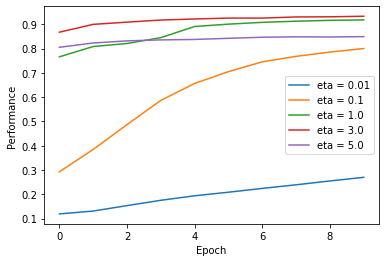

In [39]:
fig, ax = plt.subplots()
ax.plot(progress3, label='eta = 0.01')
ax.plot(progress2, label='eta = 0.1')
ax.plot(progress4, label='eta = 1.0')
ax.plot(progress30, label='eta = 3.0')
ax.plot(progress5, label='eta = 5.0')
ax.set_xlabel('Epoch')
ax.set_ylabel('Performance')
ax.legend()
plt.show()

It seems that 3 is an optimal learning rate for this network. If too small, it learns too slowly and if too large, it plateaus.